# Importing libraries

In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

# Data prepration

In [2]:
from torch.utils.data import Dataset, DataLoader

In [16]:
class Data(Dataset):
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [17]:
train_data = Data()
val_data = Data(train = False)

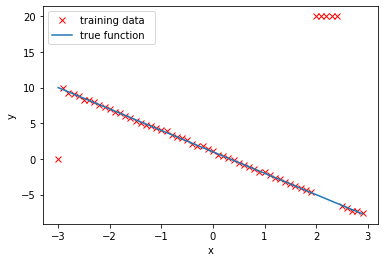

In [19]:
plt.plot(train_data.x, train_data.y, 'xr',label="training data ")
plt.plot(train_data.x, train_data.f,label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create a Linear Regression Object, Data Loader, and Criterion Function

In [20]:
from torch import nn

In [21]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [22]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

# Different learning rates - Datastructure to choose different hyperprameters

In [23]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))
MODELS = []

# Train different models for different hyperprameters

In [24]:
def train_model_with_lr(iter, lr_list):
    for i, lr in enumerate(lr_list):
        # Create Model
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        # Train
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        # Store loss for train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
        # Store loss for validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

In [25]:
train_model_with_lr(10, learning_rates)

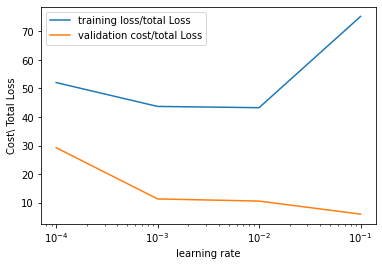

In [26]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

0 [[0.87330943]
 [0.88501084]
 [0.8967123 ]]
1 [[5.7609158]
 [5.6431866]
 [5.5254574]]
2 [[6.5828743]
 [6.449215 ]
 [6.3155546]]
3 [[14.620558 ]
 [14.1811075]
 [13.741656 ]]


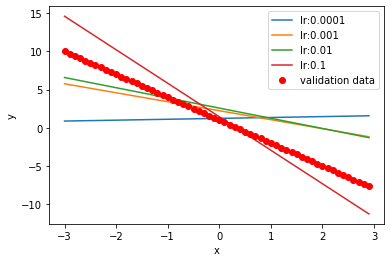

In [29]:
i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i = i + 1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()